# GDALの使い方

In [ ]:
# # GDALのインストール
# !apt install gdal-bin python-gdal python3-gdal 
# !apt install python3-rtree 

In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.dpi'] = 300 # 解像度

In [ ]:
# Google Colabを使っている場合には、ドライブのマウントを行います
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


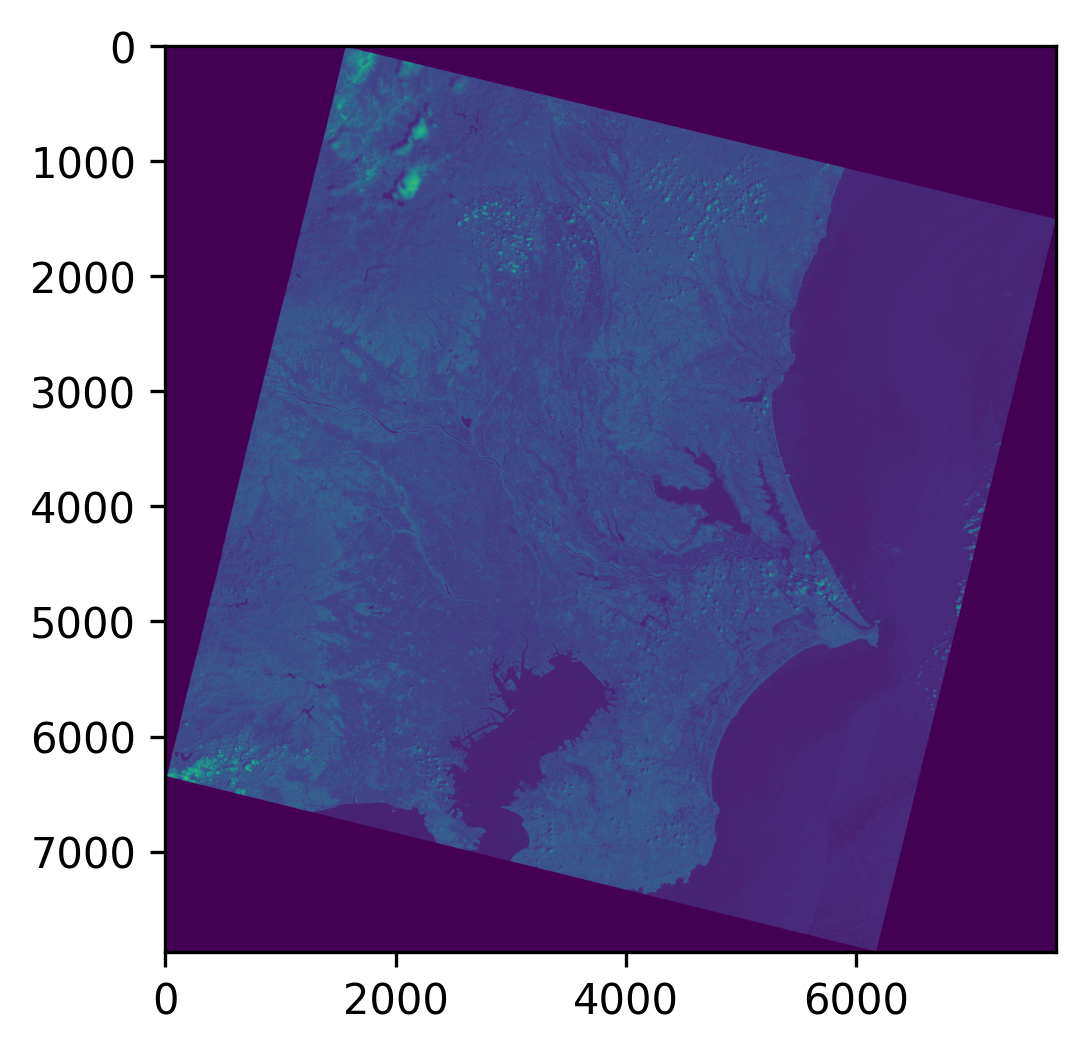

In [ ]:
#LANDSAT-8 ファイル指定
# 初めにファイルを該当のダウンロードフォルダからダウンロードしてください
fpath5 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B5.TIF" # 任意パス

#LANDSAT-8 gdal.Openを利用して画像の読み込み作業
band5_image=gdal.Open(fpath5)

#IR_Band_arrayという変数に、近赤外バンドの配列を入れます
NIR_Band_array = band5_image.ReadAsArray()

#plt.imshowで、配列を画像に表示します。
plt.imshow(NIR_Band_array)

In [ ]:
#図のサイズを設定します。
plt.figure(figsize=(8,8))

#"NIR_band_array"を、6,000から25,000の範囲で表示します。
plt.imshow(NIR_Band_array,vmin=6000,vmax=25000,cmap='gray')

#タイトルを設定します
plt.title("NIR_Band",fontsize=18)

#カラーバーを設定します
plt.colorbar()

plt.show();

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fpath2 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B2.TIF"
fpath3 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B3.TIF"
fpath4 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B4.TIF"

band2_image=gdal.Open(fpath2)
band3_image=gdal.Open(fpath3)
band4_image=gdal.Open(fpath4)

BlueBand_array  = band2_image.ReadAsArray()
GreenBand_array = band3_image.ReadAsArray()
RedBand_array   = band4_image.ReadAsArray()

青、緑、赤の画像に含まれる値の分布を確認します。

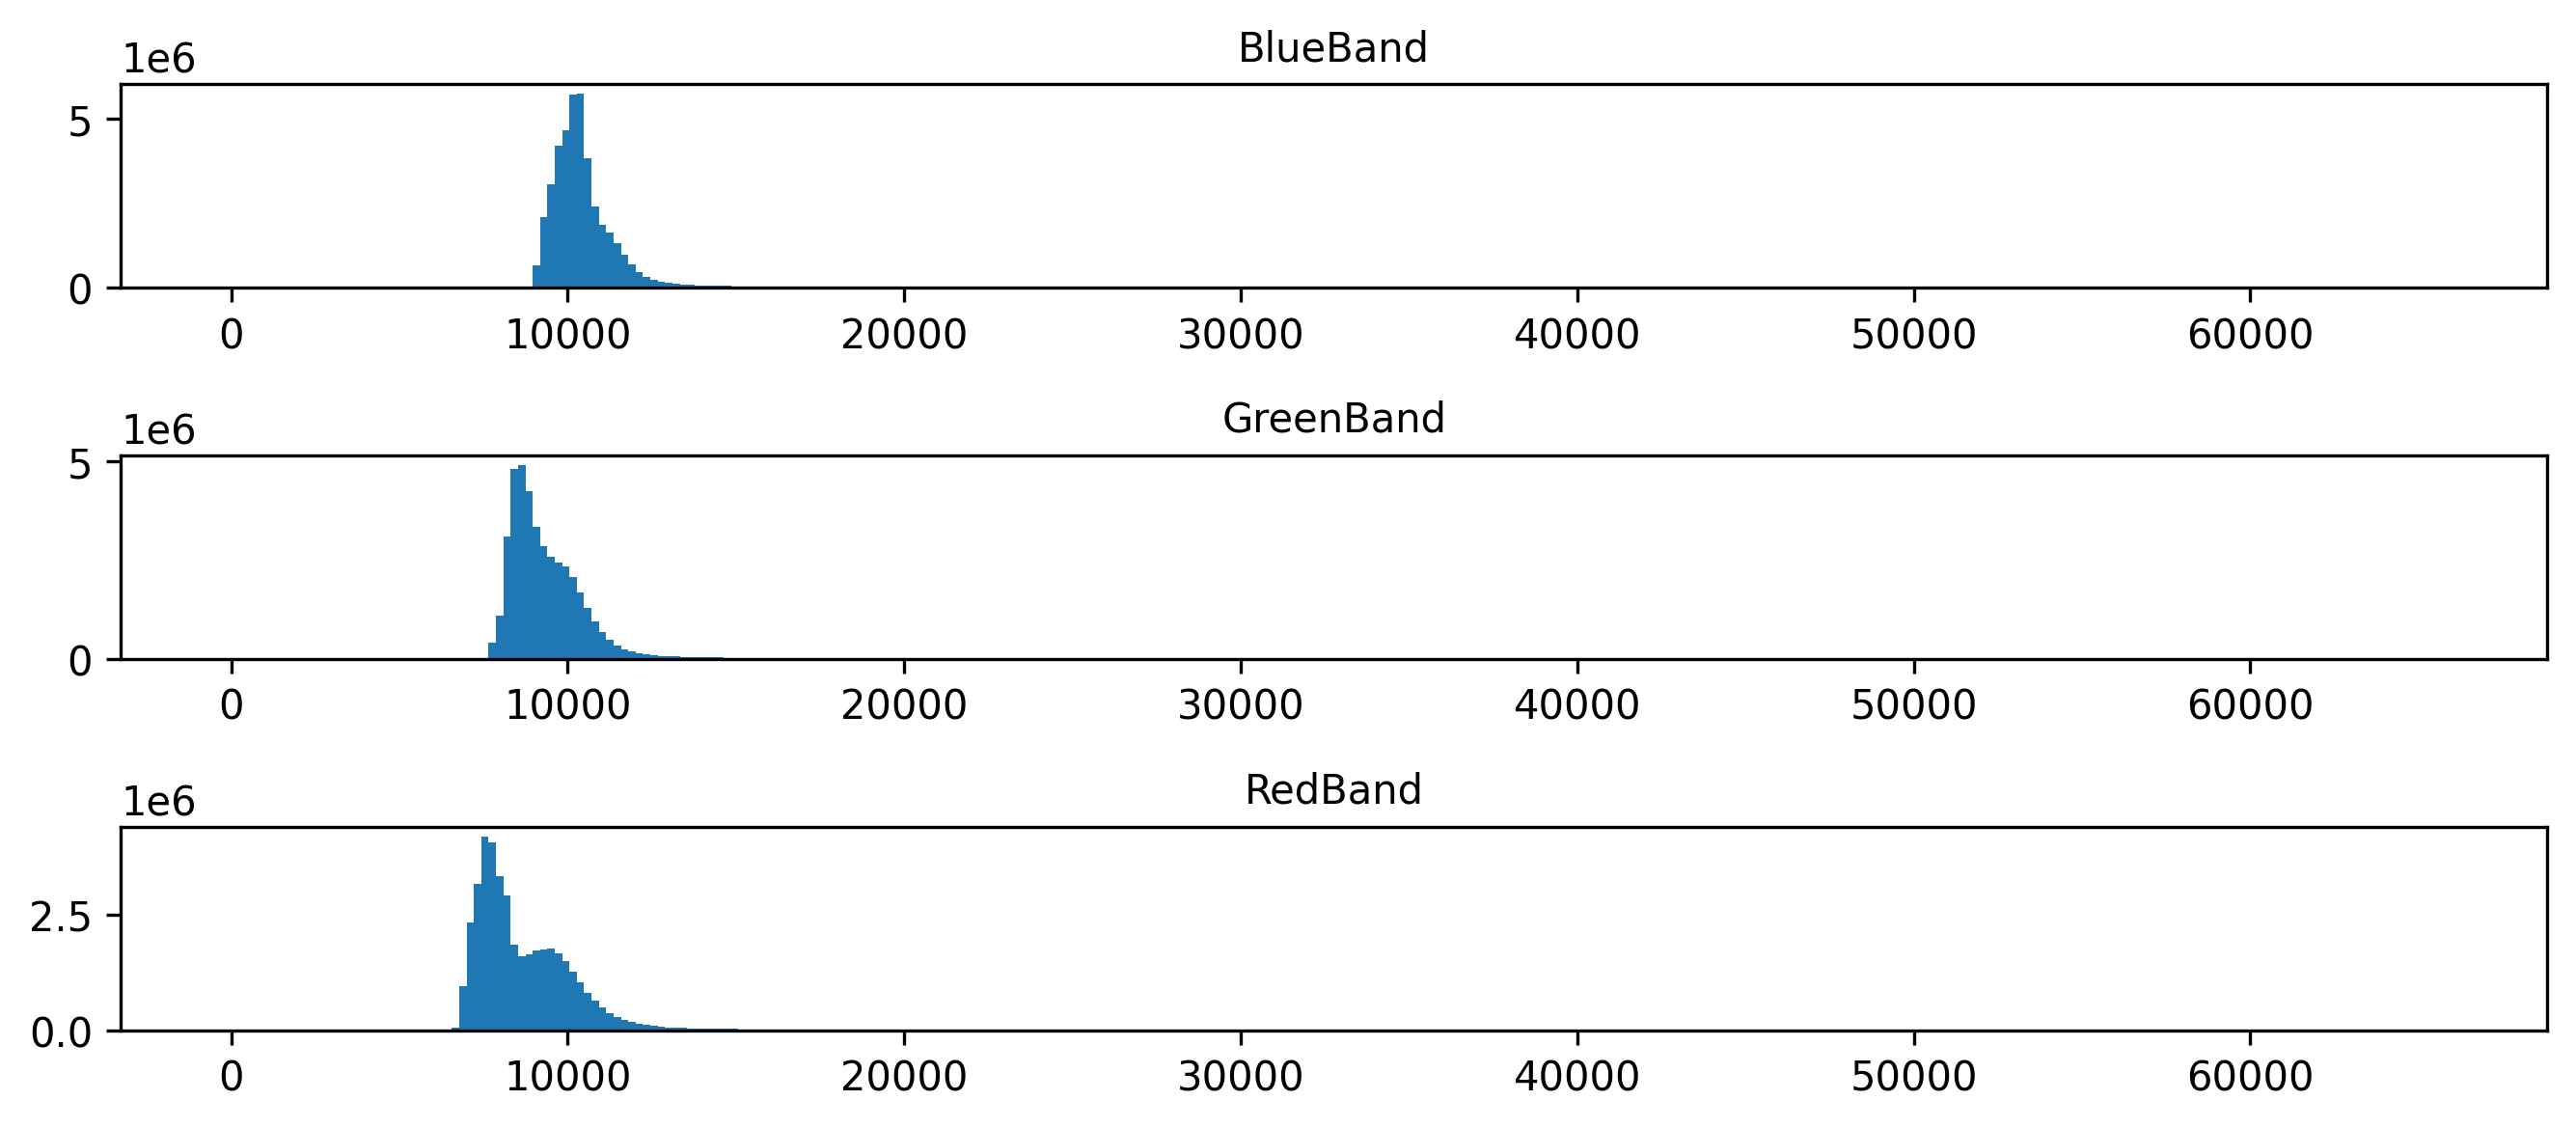

In [ ]:
plt.figure(figsize=(9,4),tight_layout=True)

plt.subplot(3,1,1)
plt.hist(BlueBand_array.flatten(),bins=300,range=(1, 65545)) #青バンドの配列のヒストグラムを表示
plt.title("BlueBand",fontsize=10)

plt.subplot(3,1,2)
plt.hist(GreenBand_array.flatten(),bins=300,range=(1, 65545)) #緑バンドの配列のヒストグラムを表示
plt.title("GreenBand",fontsize=10)

plt.subplot(3,1,3)
plt.hist(RedBand_array.flatten(),bins=300,range=(1, 65545)) #赤バンドの配列のヒストグラムを表示
plt.title("RedBand",fontsize=10)

# 図表の表示

plt.show();

各々のバンドデータを可視化。

In [ ]:
plt.figure(figsize=(9,4), tight_layout=True)

#Blueバンドの表示
plt.subplot(1,3,1)
plt.imshow(BlueBand_array,vmin=8000,vmax=15000,cmap='Blues')
plt.title("BlueBand")

#Greenバンドの表示
plt.subplot(1,3,2)
plt.imshow(GreenBand_array,vmin=7000,vmax=13000,cmap='Greens')
plt.title("GreenBand")

#Redバンドの表示
plt.subplot(1,3,3)
plt.imshow(RedBand_array,vmin=6000,vmax=12000,cmap='Reds')
plt.title("RedBand")
plt.show();

Output hidden; open in https://colab.research.google.com to view.

画像は大きいため、任意の範囲で切り出します。

In [ ]:
#全体画像から、東京都の切り出し位置を設定
minX=2700
minY=5100
deltaX=300
deltaY=300

#出力画像の名前を指定
cut_NIR_path="TOKYO_NIR_.tif"

#gdal.Translate(｛出力画像名｝,{入力画像名},srcWin=[minX,minY,deltaX,deltaY])
ds=gdal.Translate(cut_NIR_path, fpath5, srcWin=[minX,minY,deltaX,deltaY])
ds=None

切り出した画像を表示します。

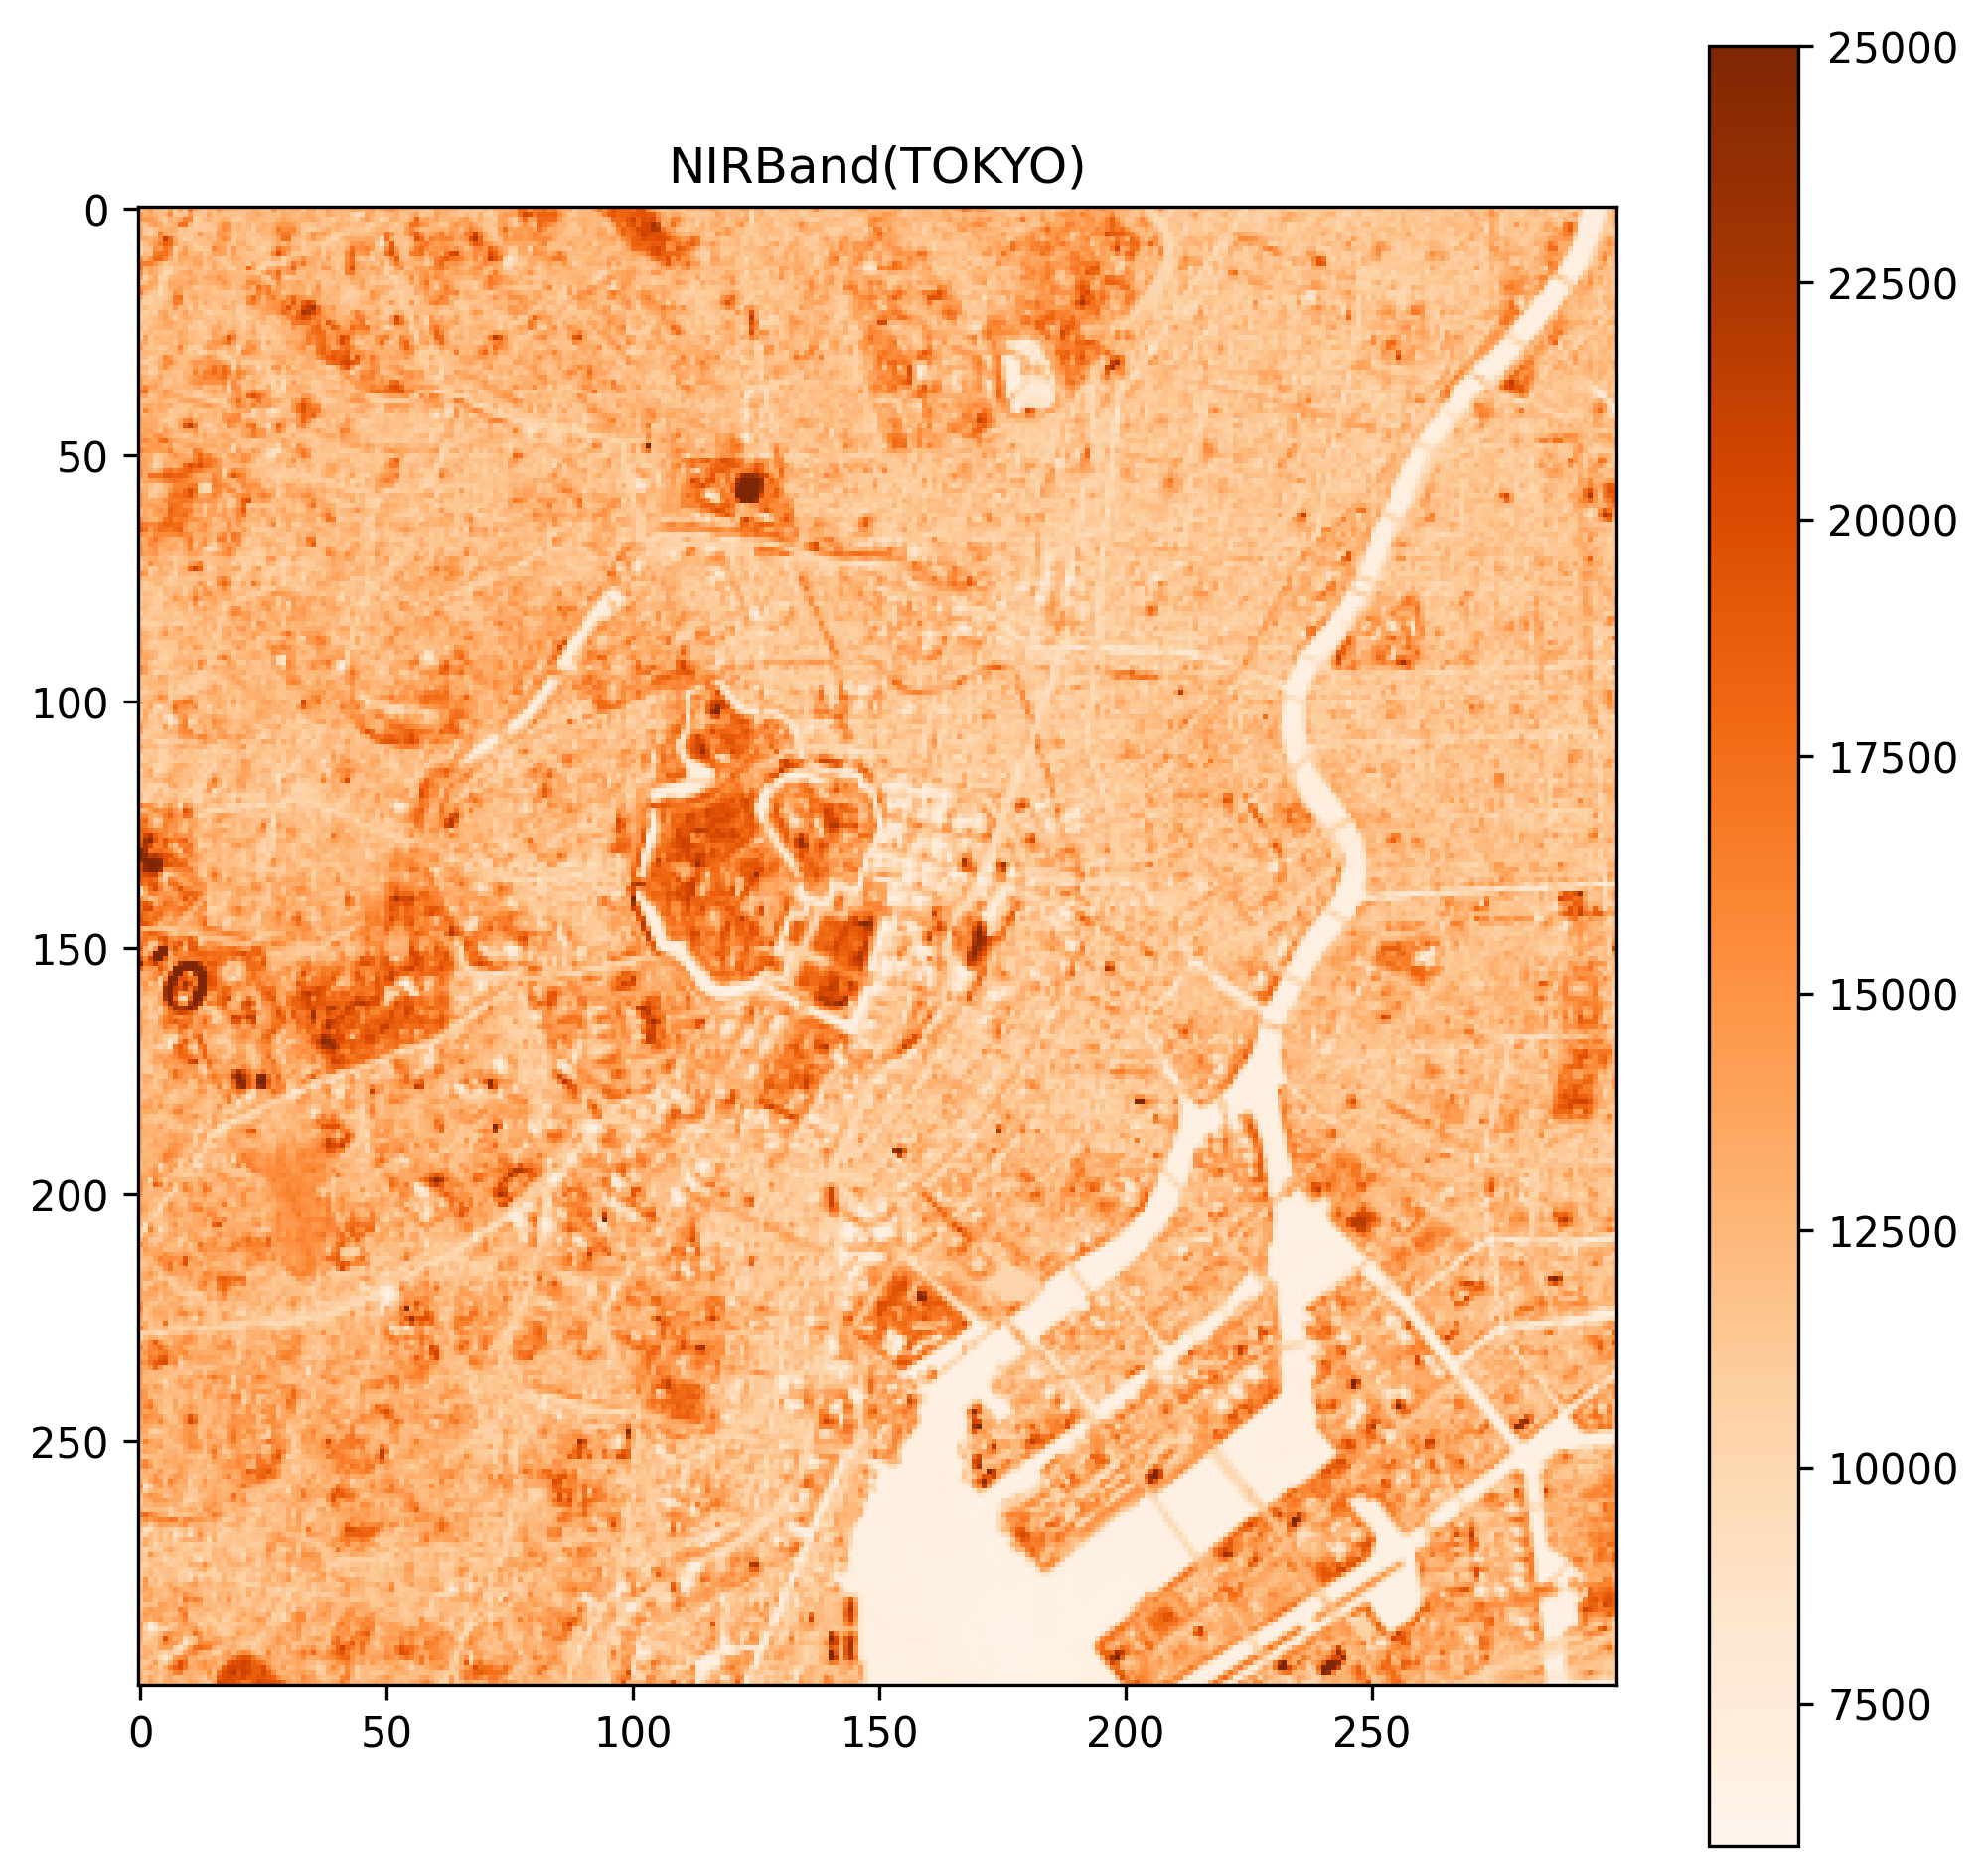

In [ ]:
#gdal.Openで画像を読み込みます
cut_NIR_img=gdal.Open(cut_NIR_path)

#画像情報を配列に変換します
cut_NIR_array   = cut_NIR_img.ReadAsArray()

#表示パラメータを決めて、画像を表示します
plt.figure(figsize=(8,8))
plt.imshow(cut_NIR_array,vmin=6000,vmax=25000,cmap='Oranges')

plt.title("NIRBand(TOKYO)")
plt.colorbar()
plt.show();

画像のEPSGを確認。

In [ ]:
band5_image=gdal.Open(fpath5)
print("EPSG: "+gdal.Info(band5_image, format='json')['coordinateSystem']['wkt'].rsplit('"EPSG","', 1)[-1].split('"')[0])

# src_prj=band5_image.GetProjection()
# print (src_prj)

EPSG: 32654


[gdal.Warp](https://gdal.org/programs/gdalwarp.html)を用いて画像が持っているEPSGコードを変更します。

In [ ]:
latlon_band5_path="latlon_band5_img.tif"

ds=gdal.Warp(latlon_band5_path,fpath5,srcSRS="EPSG:32654",dstSRS="EPSG:4326")
ds=None

EPSGが変化したかを確認します。

In [ ]:
latlon_band5_img=gdal.Open(latlon_band5_path)
print("EPSG: "+gdal.Info(latlon_band5_img, format='json')['coordinateSystem']['wkt'].rsplit('"EPSG","', 1)[-1].split('"')[0])

# src_prj=latlon_band5_img.GetProjection()
# print (src_prj)

EPSG: 4326


続いて分解能の異なる二つのTIF画像を確認してみます。

Landsat-8は幾つかの分解能の異なる画像データをもっています。その中で最も分解能が高いものがパンクロマチックセンサーで取得されたものになります。

In [ ]:
fpath4 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B4.TIF"
fpath8 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B8.TIF"

#緯度経度の情報を持ったバンド4と8のファイル名を定義
latlon_band4_path="latlon_band4_img.tif"
latlon_band8_path="latlon_band8_img.tif" 

#gdal.Warpで座標系を変換
ds=gdal.Warp(latlon_band4_path,fpath4,srcSRS="EPSG:32654",dstSRS="EPSG:4326")
ds=gdal.Warp(latlon_band8_path,fpath8,srcSRS="EPSG:32654",dstSRS="EPSG:4326")
ds=None

In [ ]:
minX=139.7101
minY=35.6721
maxX=139.7201
maxY=35.6841

#切り出し後のファイルのファイル名を定義
cut_latlon_band4_path="cut_latlon_band4_img.tif" 
cut_latlon_band8_path="cut_latlon_band8_img.tif" 

#gdal.Translate で切り出しを実行
ds=gdal.Translate(cut_latlon_band4_path,latlon_band4_path, projWin=[minX,maxY,maxX,minY])
ds=gdal.Translate(cut_latlon_band8_path,latlon_band8_path, projWin=[minX,maxY,maxX,minY])
ds=None

描画して確認します。

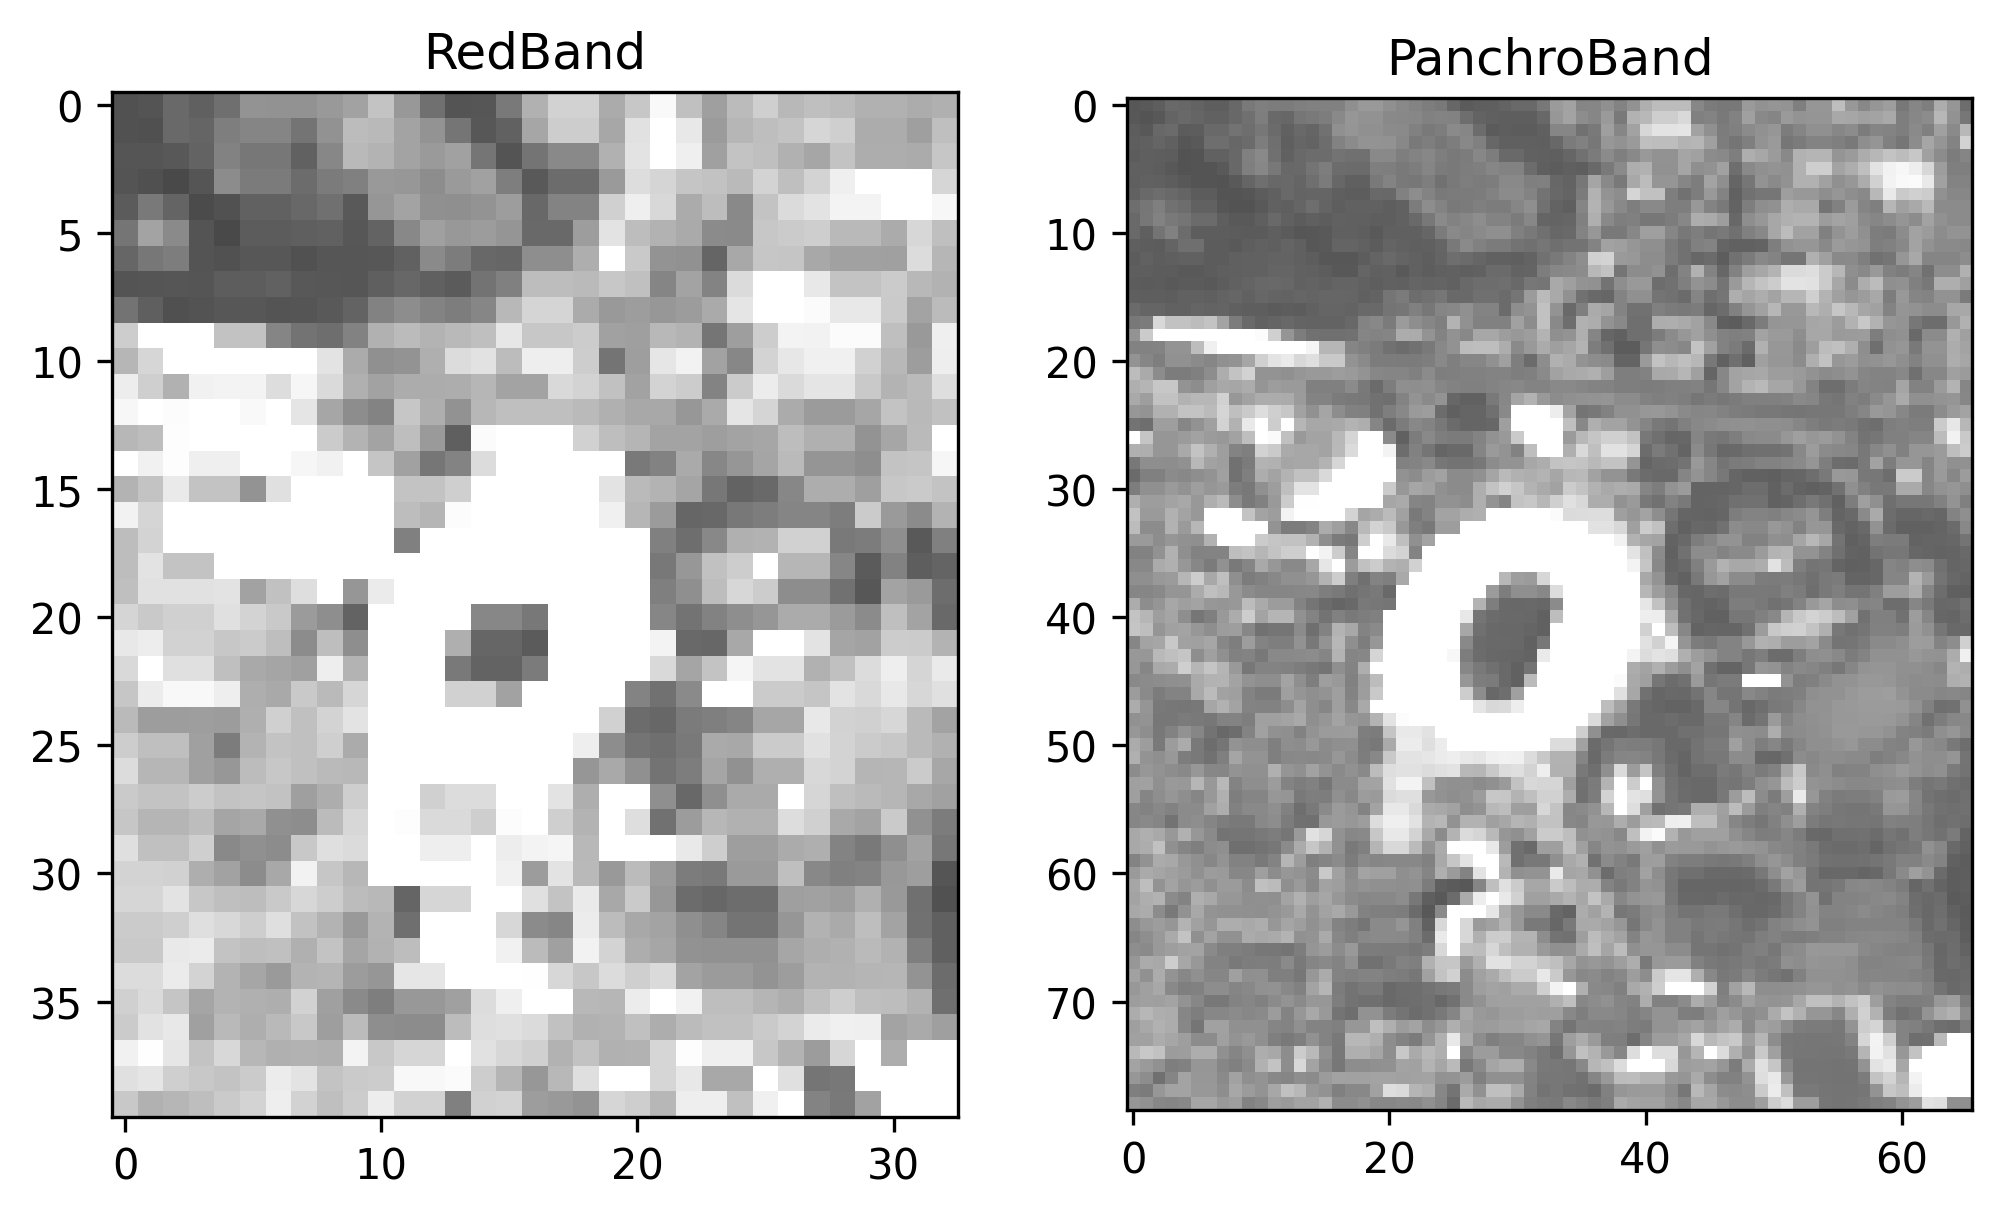

In [ ]:
#それぞれgdal.Openで画像を読み込み
cut_latlon_band4_img=gdal.Open(cut_latlon_band4_path)
cut_latlon_band8_img=gdal.Open(cut_latlon_band8_path)

#それぞれ配列情報を読み込み
cutRedBand_array   = cut_latlon_band4_img.ReadAsArray()
cutPanBand_array   = cut_latlon_band8_img.ReadAsArray()

#画像を表示
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(cutRedBand_array,vmin=6000,vmax=12000,cmap='gray')
plt.title("RedBand")

plt.subplot(1,2,2)
plt.imshow(cutPanBand_array,vmin=5000,vmax=15000,cmap='gray')
plt.title("PanchroBand")


plt.show();

左図が粗く、右図が細かいピクセル（高分解能）であることが確認できたかと思います。

続いてトゥルーカラー画像を作成します。

In [ ]:
fpath2 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B2.TIF"
fpath3 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B3.TIF"
fpath4 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B4.TIF"
fpath5=  "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B5.TIF"

#8bit出力データ名を指定しておく
band5_8bit_path="Band5_8bit.tif"
band4_8bit_path="Band4_8bit.tif"
band3_8bit_path="Band3_8bit.tif"
band2_8bit_path="Band2_8bit.tif"

#切り出しの詳細
minX=2400
minY=4500
deltaX=1500
deltaY=1500

#各バンドのファイルを、それぞれ、関心領域のみ切り出す。出力は8bitのgeotifとする
#gdal.Translate({出力画像名}, {入力画像名}, outputType={データ形式設定} , scaleParams=[[min,max]])
#
gdal.Translate(band2_8bit_path,fpath2,outputType=gdal.GDT_Byte,scaleParams=[[9700,13400]],srcWin=[minX,minY,deltaX,deltaY]  )
gdal.Translate(band3_8bit_path,fpath3,outputType=gdal.GDT_Byte,scaleParams=[[8100,12800]], srcWin=[minX,minY,deltaX,deltaY] )
gdal.Translate(band4_8bit_path,fpath4,outputType=gdal.GDT_Byte,scaleParams=[[7000,13000]],srcWin=[minX,minY,deltaX,deltaY] )
gdal.Translate(band5_8bit_path,fpath5,outputType=gdal.GDT_Byte,scaleParams=[[6000,18300]],srcWin=[minX,minY,deltaX,deltaY] )

#作成した8bitの切り出し画像を読み込む
b2_image=gdal.Open(band2_8bit_path)
b3_image=gdal.Open(band3_8bit_path)
b4_image=gdal.Open(band4_8bit_path)
b5_image=gdal.Open(band5_8bit_path)

#読み込んだ画像を配列に変換する
BlueBand_array  = b2_image.ReadAsArray()
GreenBand_array = b3_image.ReadAsArray()
RedBand_array   = b4_image.ReadAsArray()
NIRBand_array   = b5_image.ReadAsArray()

In [ ]:
#出力ファイルの設定のために、入力ファイルのX方向のピクセル数、Y方向のピクセル数を読み出す
Xsize=b2_image.RasterXSize #band2の画像のX方向ピクセル数
Ysize=b2_image.RasterYSize #band2の画像のY方向ピクセル数
dtype=gdal.GDT_Byte
band=3

#出力ファイルの設定を行う(True Color)
out_True_path ="TrueColor_TOKYO.tif"    #出力ファイル名

#空の出力ファイルを作成する
out1= gdal.GetDriverByName('GTiff').Create(out_True_path, Xsize, Ysize, band, dtype)#({出力ファイル名}, {X方向のピクセル数},{Y方向のピクセル数},{バンド数},{データ形式})

#出力ファイルの座標系を設定する
out1.SetProjection(b2_image.GetProjection())      #{出力変数}.SetProjection(座標系情報)
out1.SetGeoTransform(b2_image.GetGeoTransform())  #{出力変数}.SetGeoTransform(座標に関する６つの数字)

#Red、Green、Blueバンドの配列を、WriteArrayを用いて出力ファイルの3バンドに書き込む
out1.GetRasterBand(1).WriteArray(RedBand_array)   #赤の配列を赤バンドに書き込む
out1.GetRasterBand(2).WriteArray(GreenBand_array) #緑の配列を緑バンドに書き込む
out1.GetRasterBand(3).WriteArray(BlueBand_array)  #青の配列を青バンドに書き込む
out1.FlushCache()

In [ ]:
plt.figure(figsize=(8,8))

image1 = mpimg.imread(out_True_path)
plt.imshow(image1)
plt.title("True Color TOKYO")

plt.show();

Output hidden; open in https://colab.research.google.com to view.

続いてフォルスカラー画像を作成します。

In [ ]:
####出力ファイルの設定を行う(False Color)
#出力ファイルの設定
out_False_path="FalseColor_TOKYO.tif"

out2= gdal.GetDriverByName('GTiff').Create(out_False_path, Xsize, Ysize, band, dtype)
out2.SetProjection(b2_image.GetProjection())
out2.SetGeoTransform(b2_image.GetGeoTransform())

#Red、Green、Blueバンドの配列を、出力ファイルの3バンドに書き出す
out2.GetRasterBand(1).WriteArray(NIRBand_array)  #近赤外の配列を赤バンドに書き込む
out2.GetRasterBand(2).WriteArray(RedBand_array)  #赤の配列を緑バンドに書き込む
out2.GetRasterBand(3).WriteArray(GreenBand_array)#緑の配列を青バンドに書き込む
out2.FlushCache()  

####出力ファイルの設定を行う(Natural Color)
#出力ファイルの設定
out_Natural_path="NaturalColor_TOKYO.tif"

out3= gdal.GetDriverByName('GTiff').Create(out_Natural_path, Xsize, Ysize, band, dtype)
out3.SetProjection(b2_image.GetProjection())
out3.SetGeoTransform(b2_image.GetGeoTransform())

#Red、Green、Blueバンドの配列を、出力ファイルの3バンドに書き出す
out3.GetRasterBand(1).WriteArray(RedBand_array)  #赤の配列を赤バンドに書き込む
out3.GetRasterBand(2).WriteArray(NIRBand_array)  #近赤外の配列を緑バンドに書き込む
out3.GetRasterBand(3).WriteArray(GreenBand_array)#緑の配列を青バンドに書き込む
out3.FlushCache()

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
image1 = mpimg.imread(out_True_path)
plt.imshow(image1)
plt.title("True Color TOKYO")

plt.subplot(1,3,2)
image2 = mpimg.imread(out_False_path)
plt.imshow(image2)
plt.title("False Color TOKYO")

plt.subplot(1,3,3)
image3 = mpimg.imread(out_Natural_path)
plt.imshow(image3)
plt.title("Natural Color TOKYO")

plt.show();

Output hidden; open in https://colab.research.google.com to view.

パンクロマチック画像とトゥルーカラー画像を用いてパンシャープン画像を作成しましょう。[gdal_pansharpen](https://gdal.org/programs/gdal_pansharpen.html)を利用します。

In [ ]:
!which gdal_pansharpen.py

/usr/bin/gdal_pansharpen.py


In [ ]:
import sys
sys.path.append('/usr/bin/')
from gdal_pansharpen import gdal_pansharpen

In [ ]:
fpath8 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B8.TIF"

#8bit出力データ名を指定しておく
band8_8bit_path="Band8_8bit.tif"

#切り出しの詳細（ここでは、マルチカラーの2倍を指定することで同じ場所を切り出すことが可能）
minX=4800
minY=9000
deltaX=3000
deltaY=3000

ds=gdal.Translate(band8_8bit_path,fpath8,outputType=gdal.GDT_Byte,scaleParams=[[5000,15000]],srcWin=[minX,minY,deltaX,deltaY] )
ds=None

In [ ]:
#パンシャープン画像のファイル名を指定します。
pansharpen_path="PANSHARPEN.tif"

#ds=gdal_pansharpen(["",band8_8bit_path,out_Natural_path,pansharpen_path])
ds=gdal_pansharpen(["",band8_8bit_path,band4_8bit_path,band3_8bit_path,band2_8bit_path ,pansharpen_path])
ds=None

<function matplotlib.pyplot.show(*args, **kw)>

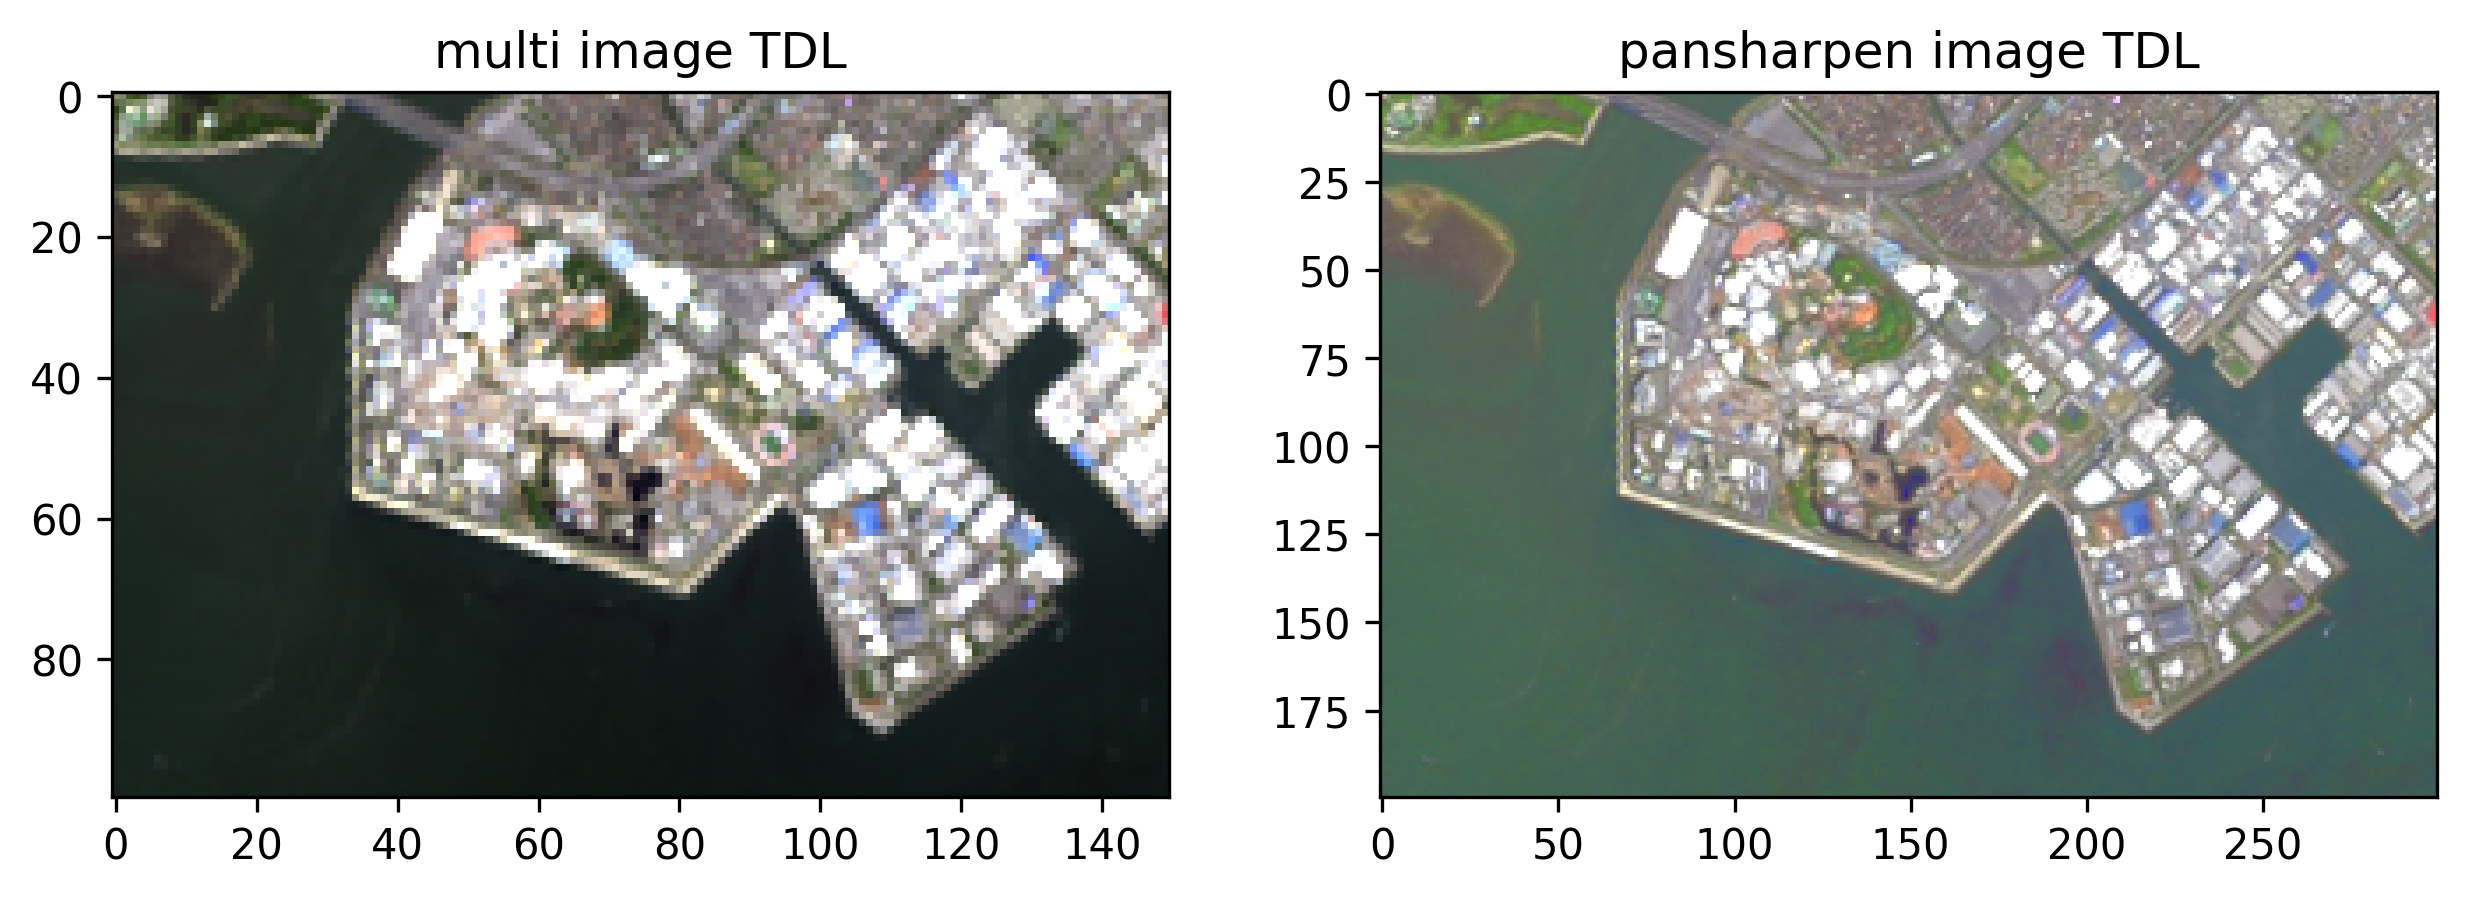

In [ ]:
#パンシャープン用切り出しの詳細
minX=1500
minY=1800
deltaX=300
deltaY=200

cut_pans="cut_pans.tif"

ds=gdal.Translate(cut_pans,pansharpen_path,srcWin=[minX,minY,deltaX,deltaY]  )
ds=None

#マルチ画像用切り出しの詳細
minX2=750
minY2=900
deltaX2=150
deltaY2=100

cut_RGB="cut_RGB.tif"

#ds=gdal.Translate(cut_RGB,out_True_path,srcWin=[minX2,minY2,deltaX2,deltaY2]  )
ds=gdal.Translate(cut_RGB,"TrueColor_TOKYO.tif",srcWin=[minX2,minY2,deltaX2,deltaY2])
ds=None

#画像の表示
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
image1 = mpimg.imread(cut_RGB)
plt.imshow(image1)
plt.title("multi image TDL")

plt.subplot(1,2,2)
image2 = mpimg.imread(cut_pans)
plt.imshow(image2)
plt.title("pansharpen image TDL")

plt.show

In [ ]:
PNG_img_path="Pansharpen.png"  #出力のファイル名を定義

gdal.Translate(
    PNG_img_path,   #出力画像名
    cut_pans, #入力画像名
    format='PNG'#出力ファイルのフォーマット指定
    )

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f720fba1990> >

<function matplotlib.pyplot.show(*args, **kw)>

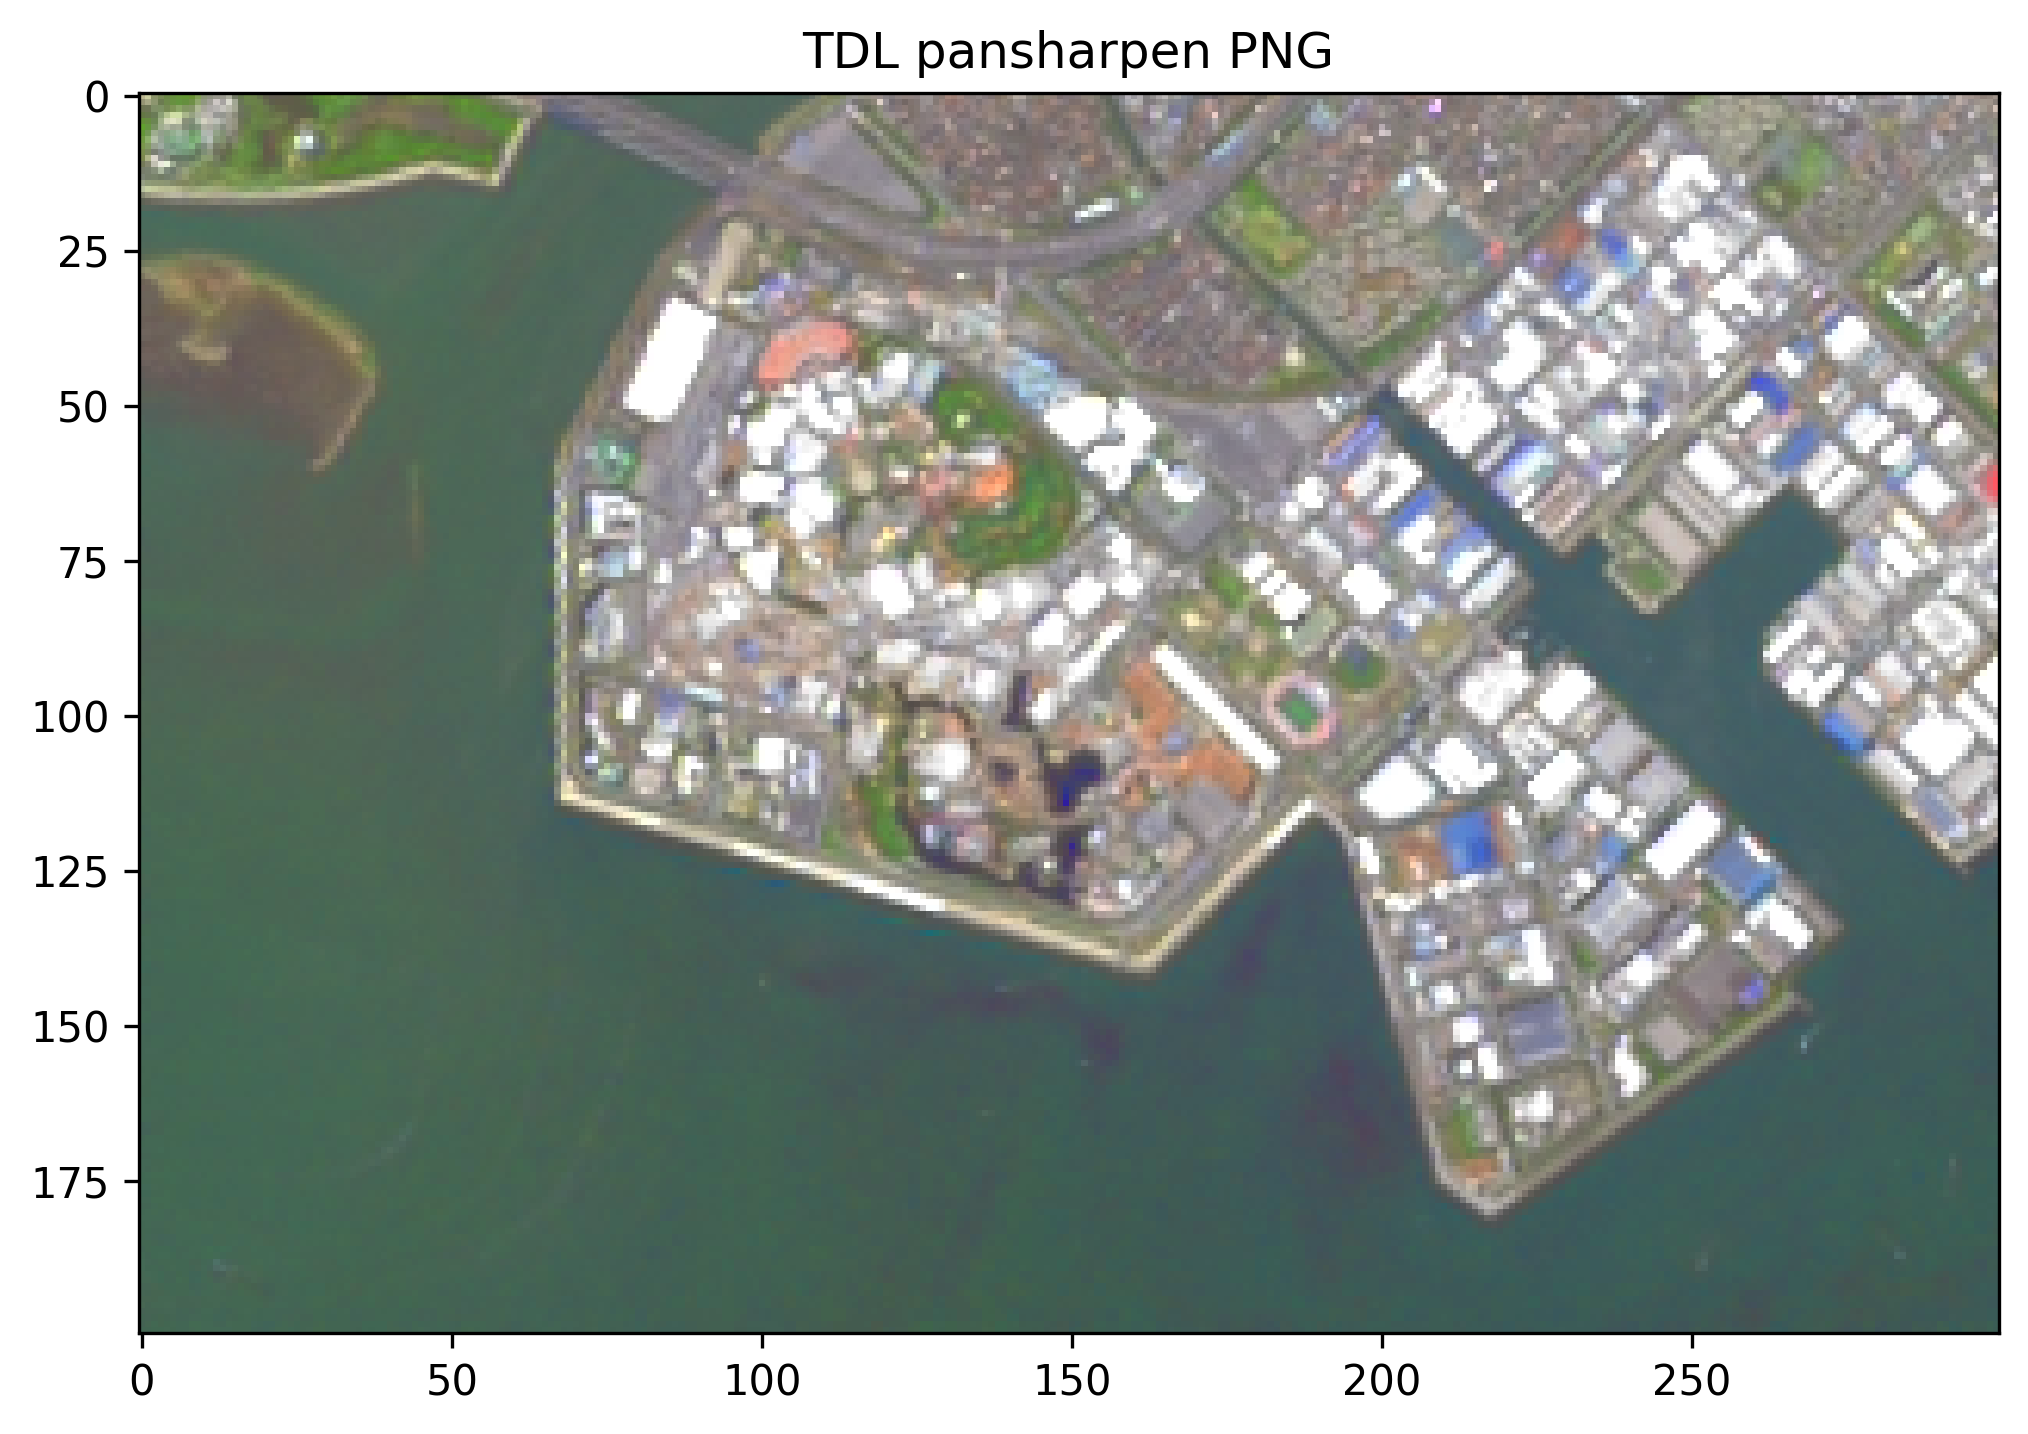

In [ ]:
plt.figure(figsize=(8,8))

PNGimg= mpimg.imread(PNG_img_path)
plt.imshow(PNGimg)

plt.title("TDL pansharpen PNG")
plt.show

最後に[gdal_merge](https://trac.osgeo.org/gdal/wiki/UserDocs/GdalMerge)を用いたコンポジット画像の作成を行います。

In [ ]:
!which gdal_merge.py

/usr/bin/gdal_merge.py


In [ ]:
sys.path.append('/usr/bin/')
import gdal_merge

In [ ]:
fpath2 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B2.TIF"
fpath3 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B3.TIF"
fpath4 = "/content/drive/MyDrive/landsat8/LC08_L1TP_107035_20200429_20200820_02_T1_B4.TIF"

#出力画像の名前を指定
Blue_path_8bit ="8bitTOKYO_Blue.tif"
Green_path_8bit="8bitTOKYO_Green.tif"
Red_path_8bit  ="8bitTOKYO_Red.tif"

#gdal.Translate(｛出力画像名｝,{入力画像名},srcWin=[minX,minY,deltaX,deltaY])
ds=gdal.Translate(Blue_path_8bit , fpath2,outputType=gdal.GDT_Byte,scaleParams=[[9700,13400]])
ds=gdal.Translate(Green_path_8bit, fpath3,outputType=gdal.GDT_Byte,scaleParams=[[8100,12800]])
ds=gdal.Translate(Red_path_8bit , fpath4,outputType=gdal.GDT_Byte,scaleParams=[[7000,13000]])
ds=None

In [ ]:
gdal_merge.main(["","-o","RGB_KANTO2.tif","-separate",Red_path_8bit,Green_path_8bit,Blue_path_8bit])

In [ ]:
plt.figure(figsize=(8,8))

img= mpimg.imread("RGB_KANTO2.tif")
plt.imshow(img)

plt.title("KANTO")
plt.show();

Output hidden; open in https://colab.research.google.com to view.